In [2]:
import numpy as np
from pandas import read_csv
from keras import models, layers
import matplotlib.pyplot as plt
import keras2onnx

In [3]:
# Load data
train_pred = read_csv("data/bbb_train_preds.csv")
train_out = read_csv("data/bbb_train_labs.csv")
test_pred = read_csv("data/bbb_test_preds.csv")
test_out = read_csv("data/bbb_test_labs.csv")

train_x = train_pred.to_numpy()
test_x = test_pred.to_numpy()
train_y = train_out.to_numpy()
test_y = test_out.to_numpy()

# Validation set
x_val = train_x[:1000]
partial_x_train = train_x[1000:]
y_val = train_y[:1000]
partial_y_train = train_y[1000:]


In [4]:
# Define model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
1010/1010 [==============================] - 2s 2ms/step - loss: 34.2940 - accuracy: 0.5288 - val_loss: 20.5463 - val_accuracy: 0.6910
Epoch 2/20
1010/1010 [==============================] - 1s 1ms/step - loss: 9.8371 - accuracy: 0.5422 - val_loss: 9.0021 - val_accuracy: 0.6010
Epoch 3/20
1010/1010 [==============================] - 1s 1ms/step - loss: 2.8692 - accuracy: 0.6218 - val_loss: 1.5216 - val_accuracy: 0.6620
Epoch 4/20
1010/1010 [==============================] - 1s 990us/step - loss: 1.1085 - accuracy: 0.7137 - val_loss: 1.1436 - val_accuracy: 0.6950
Epoch 5/20
1010/1010 [==============================] - 1s 1ms/step - loss: 1.0574 - accuracy: 0.7159 - val_loss: 1.1826 - val_accuracy: 0.6950
Epoch 6/20
1010/1010 [==============================] - 1s 988us/step - loss: 1.0521 - accuracy: 0.7159 - val_loss: 1.1424 - val_accuracy: 0.6950
Epoch 7/20
1010/1010 [==============================] - 1s 982us/step - loss: 1.0498 - accuracy: 0.7158 - val_loss: 1.1362 - val_a

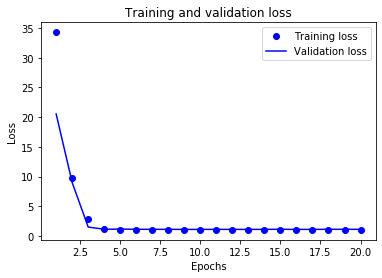

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

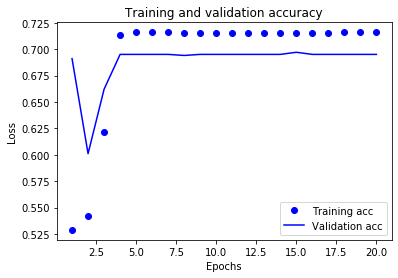

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [8]:
# Predictions on test set
predictions = model.predict(test_x)
predictions[0]

array([1.3670523e-01, 7.3966658e-04, 4.7770087e-03, 4.9317833e-03,
       2.1016041e-03, 3.5421461e-02, 2.1325774e-04, 6.3092995e-04,
       3.0761342e-08, 1.4686160e-08, 8.8717807e-03, 1.0310360e-05,
       3.3117847e-06, 1.7334760e-11, 2.3768516e-09, 6.1459072e-02,
       1.3546363e-03, 7.7233370e-04, 1.1407933e-13, 3.5704874e-05,
       9.7874768e-13, 3.4458907e-07, 6.2949475e-05, 4.1818535e-03,
       8.1963570e-13, 1.6795726e-02, 7.2093099e-01], dtype=float32)

In [10]:
# Export model to ONNX
output_model_path = "../backend/models/keras_bbb.onnx"
onnx_model = keras2onnx.convert_keras(model, model.name)
keras2onnx.save_model(onnx_model, output_model_path)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 13 -> 9
The maximum opset needed by this model is only 9.
